# Performing Exploratory Data Analysis on the E-commerce Data dataset

In [1]:
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objs as go
color=sns.color_palette()

### Loading the dataset and displaying a sample

In [2]:
df=pd.read_csv("../input/ecommerce-data/data.csv",encoding="ISO=8859-1", dtype={'CustomerID': str,'InvoiceNo': str})

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


### Printing data set size and feature count

In [4]:
df.shape

(541909, 8)

### Data cleaning and getting rid of NULL values

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

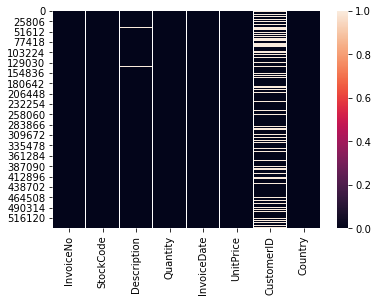

In [6]:
sns.heatmap(df.isnull())

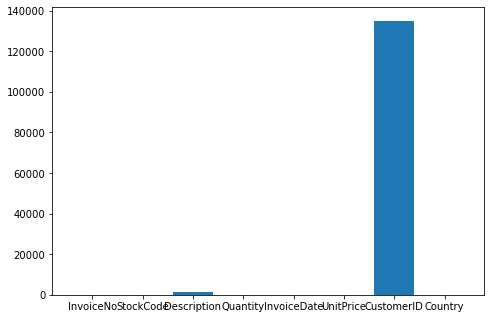

In [7]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
labels=df.columns
msvals=df.isnull().sum()
ax.bar(labels,msvals)
plt.show()

In [8]:
df[df.isnull().T.any().T].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


#### Replacing empty Customer ID's with unsold

In [9]:
df['CustomerID'].fillna("Unsold",inplace=True)

In [10]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

#### Successfully removed all NULL values

In [11]:
df.dropna(subset=['Description'],inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


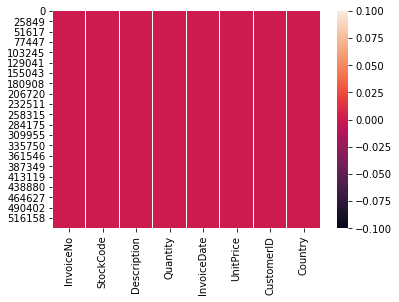

In [13]:
sns.heatmap(df.isnull())

#### Removing Duplicate Values

In [14]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

5268


#### Removing entries where Quantity is negative as it is not possible

#### Also removing negative prices to remove all shop expenditures and the like

In [15]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>=0]
df.describe()

,Quantity,UnitPrice
count,525460.00000,525460.000000
mean,10.68106,3.918228
std,157.39957,36.073270
min,1.00000,0.000000
25%,1.00000,1.250000
50%,4.00000,2.080000
75%,11.00000,4.130000
max,80995.00000,13541.330000


#### Adding a new feature to the dataset called Cost

In [16]:
df['Cost']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### Converting the InvoiceDate feature from a String to the Timestamp format

In [17]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate,format='%m/%d/%Y %H:%M')

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Adding more features for easier visualization

In [19]:
df.insert(loc=5,column='Year_Month',value=df['InvoiceDate'].map(lambda x:100*x.year+x.month))
df.insert(loc=6,column='Month',value=df.InvoiceDate.dt.month)
df.insert(loc=7,column='Day',value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=8,column='Hour',value=df.InvoiceDate.dt.hour)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,201012,12,3,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,201012,12,3,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34


In [21]:
#df.to_csv('Data/data_cleaned.csv',encoding="ISO=8859-1")

## Exploratory Data Analysis

### Plotting number of orders per month

In [22]:
df2=df.copy(deep=True)
df=df[df['CustomerID']!='Unsold']

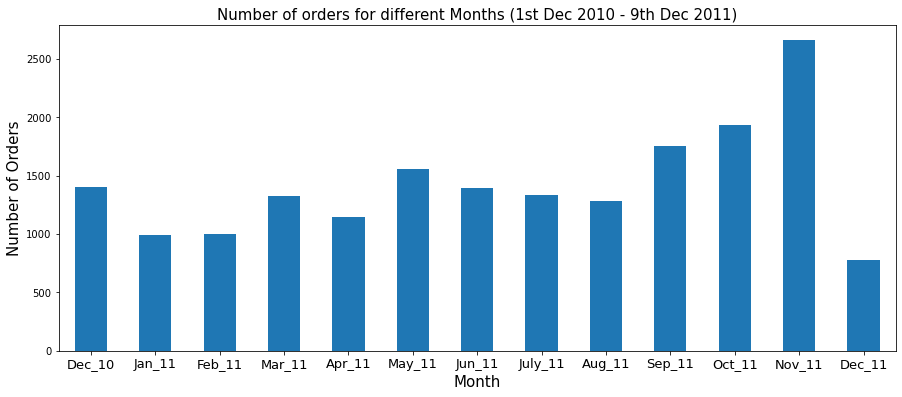

In [23]:
ax = df.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

#### We can see that sales shoot up in November due to the holiday season with Thanksgiving, Christmas etc. coming up

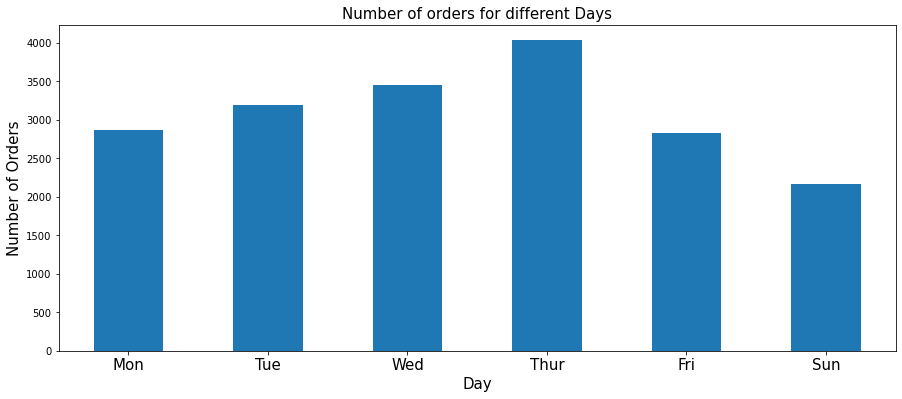

In [24]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

#### Maximum sales happen on a Thursday with the Online Store likely not functioning on a Saturday

### Orders per Country

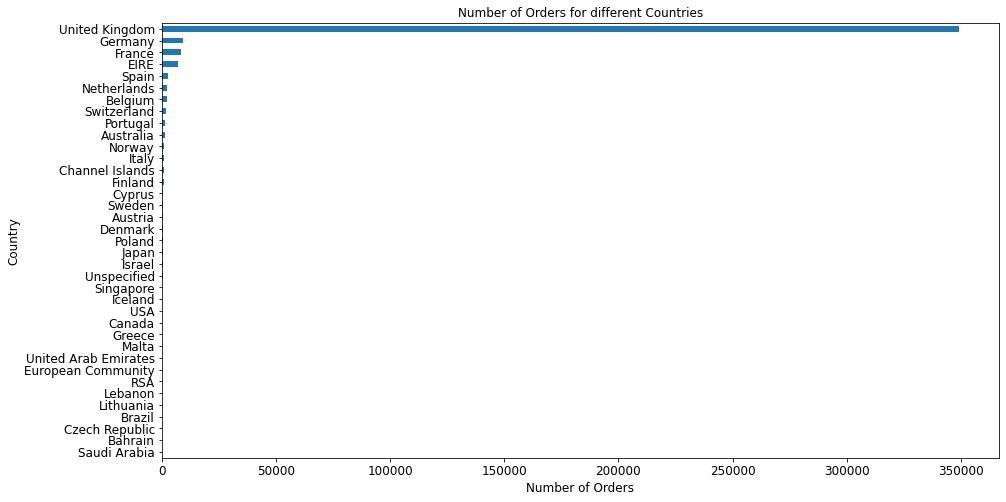

In [25]:
dfcountry=df.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
dfcountry.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [26]:
from plotly.offline import init_notebook_mode,iplot
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))


data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order no.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

No. of countries in the dataframe: 37


### Orders per Country without UK

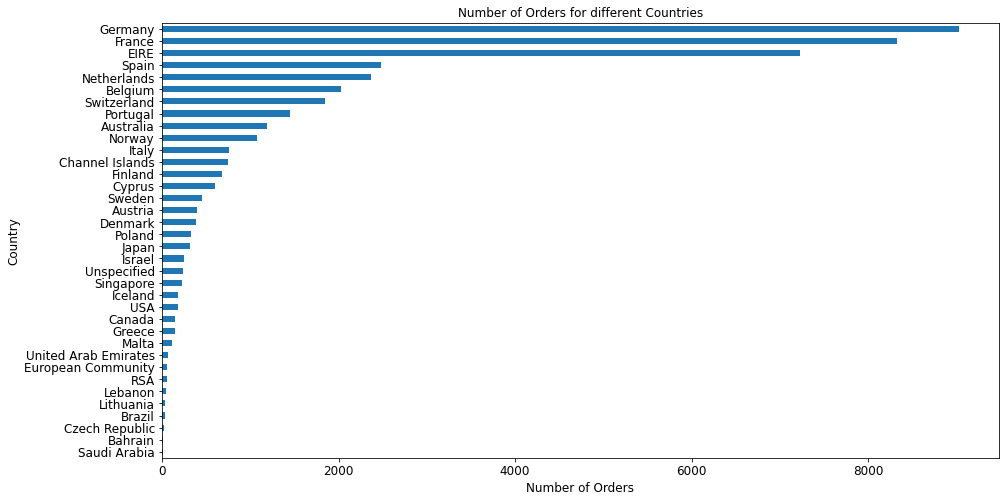

In [27]:
del dfcountry['United Kingdom']
plt.subplots(figsize=(15,8))
dfcountry.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### Revenue per Country

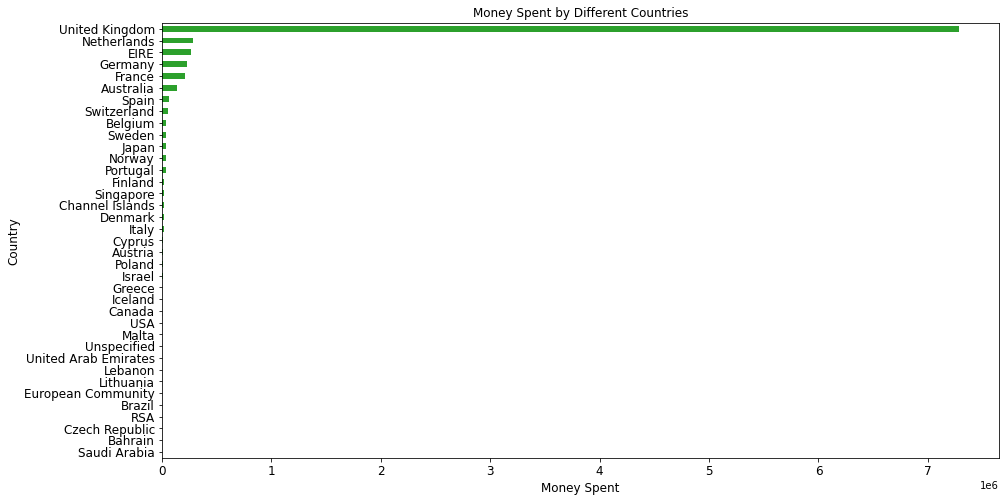

In [28]:
dfcountryrev=df.groupby('Country')['Cost'].sum().sort_values()
plt.subplots(figsize=(15,8))
dfcountryrev.plot(kind='barh', fontsize=12, color=color[2])
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Different Countries', fontsize=12)
plt.show()

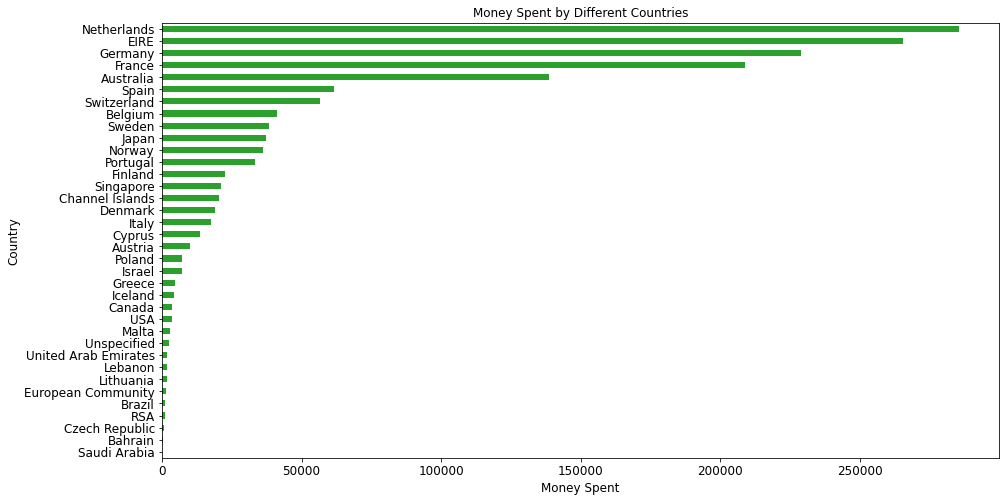

In [29]:
del dfcountryrev['United Kingdom']
plt.subplots(figsize=(15,8))
dfcountryrev.plot(kind='barh', fontsize=12, color=color[2])
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Different Countries', fontsize=12)
plt.show()

#### We can see that despite Germany topping Netherlands in number of orders, Netherlands spent more on the items themselves

In [30]:
df[df['Country']=='Germany']['Cost'].mean()

25.332712972194354

In [31]:
df[df['Country']=='Netherlands']['Cost'].mean()

120.79828184511216

### Unit Price Analysis

In [32]:
df['UnitPrice'].describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

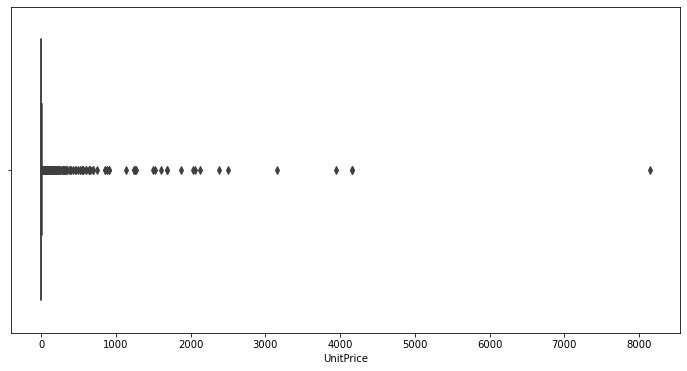

In [33]:
plt.subplots(figsize=(12,6))
sns.boxplot(df.UnitPrice)
plt.show()

#### We see that majority of the items fall in the 0-1000 price range

In [34]:
maxdf=df.sort_values(by='UnitPrice',ascending=False)
maxdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,201105,5,2,13,8142.75,16029,United Kingdom,8142.75
422376,573080,M,Manual,1,2011-10-27 14:20:00,201110,10,4,14,4161.06,12536,France,4161.06
422351,573077,M,Manual,1,2011-10-27 14:13:00,201110,10,4,14,4161.06,12536,France,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,201110,10,3,11,3949.32,12744,Singapore,3949.32
374542,569382,M,Manual,1,2011-10-03 16:44:00,201110,10,1,16,3155.95,15502,United Kingdom,3155.95


In [35]:
codes=df[df['StockCode'].str.contains('^[a-zA-Z]+',regex=True)]['StockCode'].unique()
maxdf=maxdf[~(maxdf['StockCode'].isin(codes))]
maxdf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,201106,6,5,15,649.5,15098,United Kingdom,649.5
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,201106,6,5,15,649.5,15098,United Kingdom,38970.0
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,201104,4,4,12,295.0,14973,United Kingdom,295.0
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,201012,12,4,8,295.0,16607,United Kingdom,295.0
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,201101,1,1,14,295.0,17406,United Kingdom,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314748,564651,21786,POLKADOT RAIN HAT,144,2011-08-26 14:19:00,201108,8,5,14,0.0,14646,Netherlands,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,201103,3,3,12,0.0,13113,United Kingdom,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom,0.0
446794,574920,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,2011-11-07 16:34:00,201111,11,1,16,0.0,13985,United Kingdom,0.0


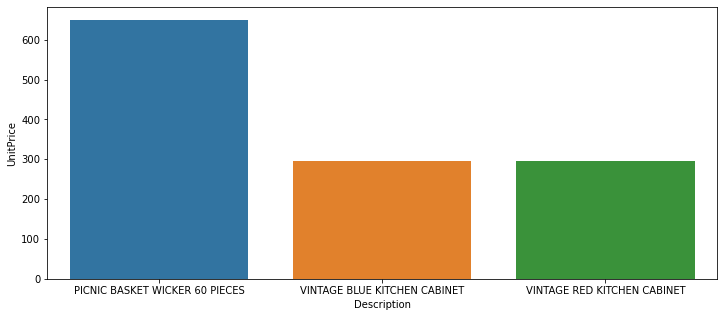

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x='Description',y='UnitPrice',data=maxdf.head())

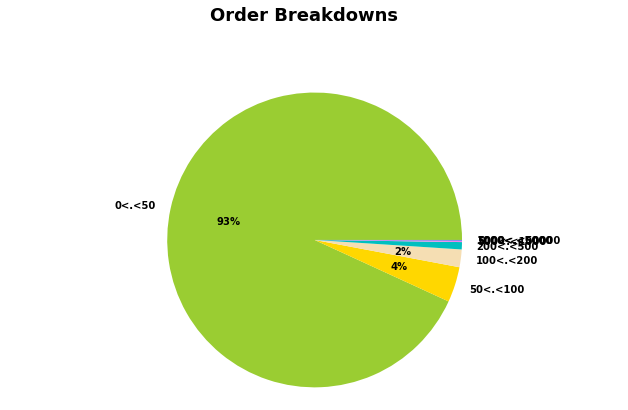

In [37]:
dftemp=df[df['Cost']>0]
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = dftemp[(dftemp['Cost'] < price) &
                       (dftemp['Cost'] > price_range[i-1])]['Cost'].count()
    count_price.append(val)
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Order Breakdowns", ha='center', fontsize = 18);

#### It is noted that more than 90% of all transactions are in the 0-50 price range

#### We see that the minimum value of items sold is 0, therefore we conclude that there are items being given out for free

In [38]:
freeitems=df[df['UnitPrice']==0]
freeitems.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,201012,12,7,14,0.0,12647,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,201012,12,4,14,0.0,16560,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,201012,12,2,13,0.0,14911,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom,0.0


In [39]:
freeitems.Year_Month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: Year_Month, dtype: int64

In [40]:
freeitems.Year_Month.value_counts().mean()

3.6363636363636362

#### An average of 3.6 ~ 4 items were being given out for free per month

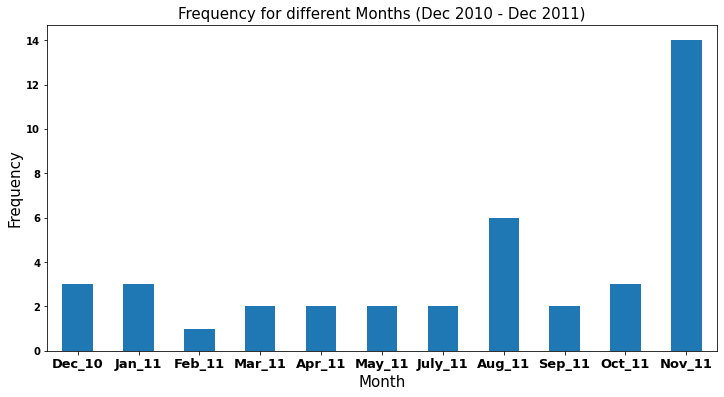

In [41]:
ax = freeitems.Year_Month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

#### From the graph, it is evident that the most free items are given out in November of 2011, most likely due to a festive/holiday sale that was held then

### Checking out the highest spending customers

     CustomerID         Country       Cost
1698      14646     Netherlands  280206.02
4210      18102  United Kingdom  259657.30
3737      17450  United Kingdom  194390.79
3017      16446  United Kingdom  168472.50
1888      14911            EIRE  143711.17
57        12415       Australia  124914.53
1342      14156            EIRE  117210.08
3780      17511  United Kingdom   91062.38
2711      16029  United Kingdom   80850.84
0         12346  United Kingdom   77183.60
3185      16684  United Kingdom   66653.56
1298      14096  United Kingdom   65164.79
1005      13694  United Kingdom   65039.62
2185      15311  United Kingdom   60632.75
570       13089  United Kingdom   58762.08


Text(0.5, 1.0, 'Top 10 Customers')

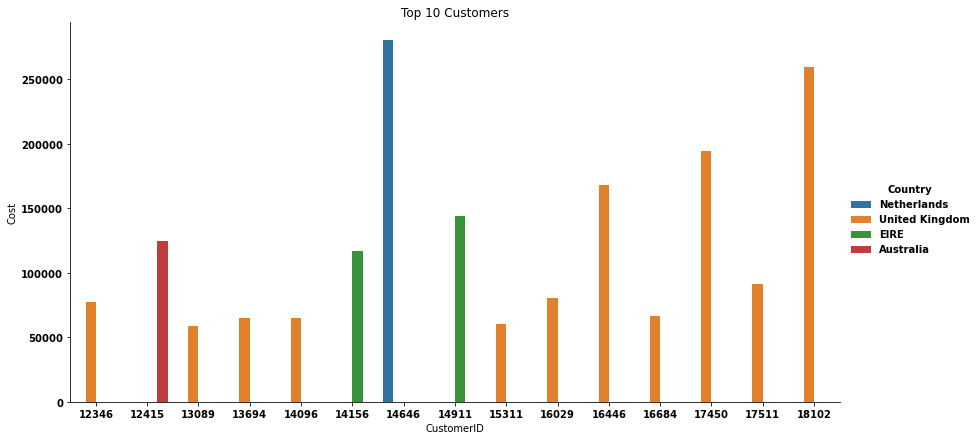

In [42]:
spenddf=df.groupby(by=['CustomerID','Country'],as_index=False)['Cost'].sum().sort_values(by='Cost',ascending=False).iloc[0:15]
print(spenddf)
sns.catplot(data=spenddf,x='CustomerID',y='Cost',hue='Country',kind='bar',height=6,aspect=2)
plt.title('Top 10 Customers')

### Number of unique customers per month

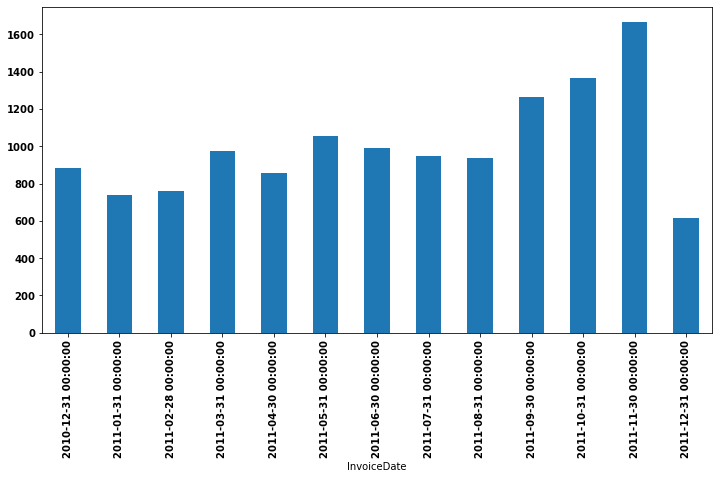

In [43]:
dfunique=df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of customers',fontsize=15)
ax.set_title('Number of unique customers per month',fontsize=15)
plt.show()

#### We see that max number of unique/new customers are in November of 2011, most likely due to the promotional sale being held at that time

### Most popular items

Text(0.5, 1.0, 'Top 15 products')

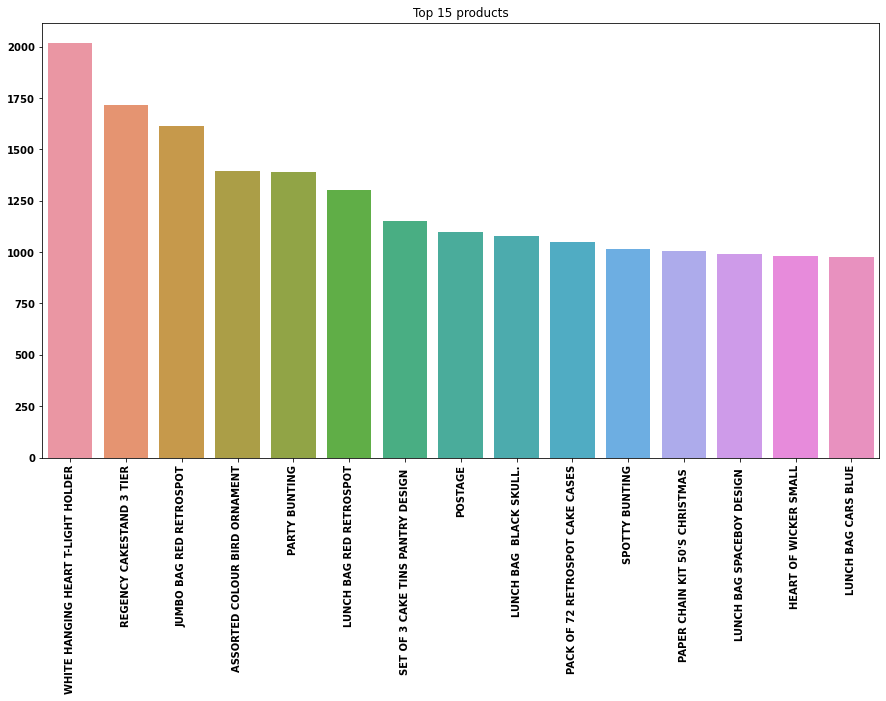

In [44]:
y=df.Description.value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(15,8))
sns.barplot(y=y.values,x=y.index)
plt.xticks(rotation=90)
plt.title("Top 15 products")

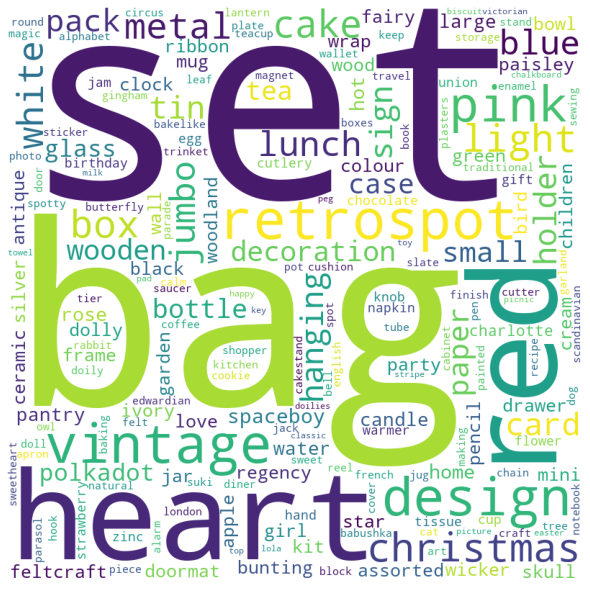

In [45]:
from wordcloud import WordCloud, STOPWORDS
item_words=''
stopwords=set(STOPWORDS)
for val in df.Description:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    item_words+=" ".join(tokens)+" "
wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=10,collocations=False).generate(item_words)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

#### Some of the most popular keywords are 'bag', 'set' ,'heart' and 'red'

### Misc. analysis

No. of Unsold items= 132728
Total No. of items= 525460
Percentage of Unsold items= 25.25939177101968 %


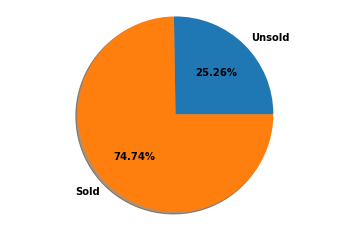

In [46]:
unsoldno=df2[df2['CustomerID']=='Unsold'].shape[0]
totalitems=df2.shape[0]
percunsold=unsoldno/totalitems*100
print("No. of Unsold items=",unsoldno)
print("Total No. of items=",totalitems)
print("Percentage of Unsold items=",percunsold,'%')
fig1,ax1=plt.subplots()
ax1.pie([unsoldno,totalitems-unsoldno],labels=['Unsold','Sold'],autopct='%1.2f%%',shadow=True)
ax1.axis('equal')
plt.show()

In [47]:
codes=df[df['StockCode'].str.contains('^[a-zA-Z]+',regex=True)]['StockCode'].unique()
print(codes)
for i in codes:
 print("{:<15} = {:<15}".format(i,df[df['StockCode']==i]['Description'].unique()[0]))

['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
POST            = POSTAGE        
C2              = CARRIAGE       
M               = Manual         
BANK CHARGES    = Bank Charges   
PADS            = PADS TO MATCH ALL CUSHIONS
DOT             = DOTCOM POSTAGE 


#### We make a note of the misc. charges like postage etc as they end up being the most expensive non-item transactions

## Hypothesis Testing

### Testing if Sample from UK purchases'  Mean purchase time is equal to the population mean 

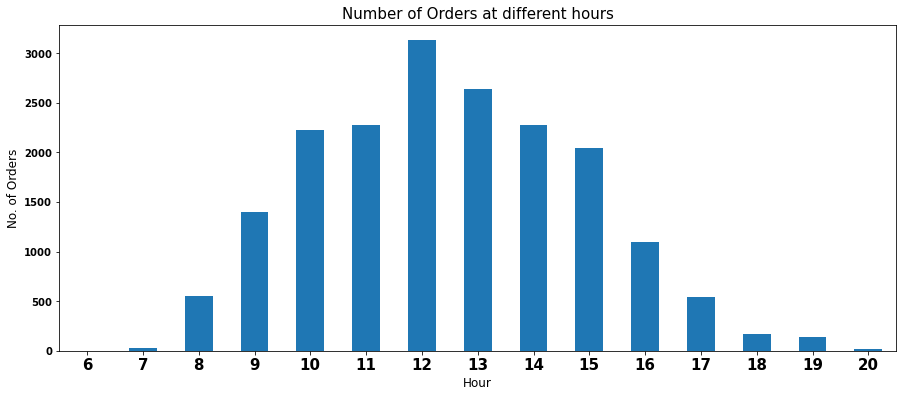

In [48]:
ax=df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=12)
ax.set_ylabel('No. of Orders',fontsize=12)
ax.set_title('Number of Orders at different hours',fontsize=15)
ax.set_xticklabels(range(6,21),rotation='horizontal',fontsize=15)
plt.show()

In [49]:
sample_df=df[df['Country']=='United Kingdom'].sample(n=500,random_state=10)
sample_df.describe()

,Quantity,Year_Month,Month,Day,Hour,UnitPrice,Cost
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.856000,201101.020000,7.620000,3.664000,13.034000,3.409260,18.580120
std,22.968028,23.912826,3.475595,1.928352,2.249214,9.284096,30.342029
min,1.000000,201012.000000,1.000000,1.000000,7.000000,0.120000,0.210000
25%,2.000000,201104.000000,5.000000,2.000000,12.000000,1.040000,5.000000
50%,4.000000,201107.000000,8.000000,4.000000,13.000000,1.950000,10.500000
75%,12.000000,201110.000000,11.000000,5.000000,15.000000,3.750000,19.575000
max,378.000000,201112.000000,12.000000,7.000000,19.000000,195.000000,250.000000


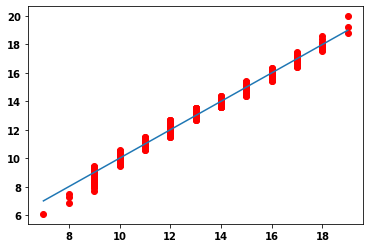

In [50]:
from scipy.stats import norm
def normality_check(data):
    pos =[]
    th_Q =[]
    data = np.sort(np.array(data))
    pos = [(i - 0.5)/len(data) for i in range(1, len(data)+1)]
    th_Q = [norm.ppf(i, np.mean(data), np.std(data, ddof = 1)) for i in pos]
    plt.plot(data, th_Q, 'ro', data, data)
    plt.show()

normality_check(sample_df["Hour"])

In [51]:
from math import sqrt
time_mean=sample_df['Hour'].mean()
time_var=sample_df['Hour'].var()
time_sd=sqrt(time_var)
time_sampsize=sample_df['Hour'].shape[0]
print('Sample mean=',time_mean)
print('Population mean=',df['Hour'].mean())
print('Sample variance=',time_var)
print('Sample std deviation=',time_sd)
print('Sample size=',time_sampsize)

Sample mean= 13.034
Population mean= 12.721578582850391
Sample variance= 5.058961923847695
Sample std deviation= 2.249213623435465
Sample size= 500


In [52]:
from scipy.stats import norm

def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = time_mean
pop_mean = df['Hour'].mean()
sample_size =  time_sampsize
std_dev = time_sd

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 12.721578582850391
H1 : μ != 12.721578582850391
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 3.105954539374992 

Reject NULL hypothesis


#### Seeing that the Z value > 1.96, we reject the Null hypothesis that states that the sample mean = population mean

### Testing if Sample purchase times outside the UK are equal to an assumed mean of 1200 hours

In [53]:
sample2=df[df['Country']!='United Kingdom']
sample2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,201012,12,3,8,3.75,12583,France,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,201012,12,3,8,3.75,12583,France,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,201012,12,3,8,3.75,12583,France,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,201012,12,3,8,0.85,12583,France,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,201012,12,3,8,0.65,12583,France,15.6


In [54]:
sample2.describe()

,Quantity,Year_Month,Month,Day,Hour,UnitPrice,Cost
count,43505.000000,43505.000000,43505.000000,43505.000000,43505.000000,43505.000000,43505.000000
mean,20.959637,201102.246133,7.335203,3.391403,12.062338,4.357557,36.827589
std,48.027529,21.143334,3.391330,1.670226,2.408614,43.193024,87.313143
min,1.000000,201012.000000,1.000000,1.000000,7.000000,0.000000,0.000000
25%,6.000000,201104.000000,5.000000,2.000000,10.000000,1.250000,13.200000
50%,12.000000,201107.000000,8.000000,3.000000,12.000000,1.950000,17.700000
75%,18.000000,201110.000000,10.000000,5.000000,14.000000,3.750000,30.000000
max,2400.000000,201112.000000,12.000000,7.000000,19.000000,4161.060000,4992.000000


In [55]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = sample2['Hour'].mean()
pop_mean = 12
sample_size =  sample2.shape[0]
std_dev = sqrt(sample2['Hour'].var())

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 12
H1 : μ > 12
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 5.398249774201496 

Reject NULL hypothesis


#### Since Z value is >> 1.645, Null hypothesis which states that the mean purchase time <=1200 hours is rejected

### Plotting Simple Correlation between Quantity purchased and Unit Price

In [56]:
dftemp2=df.loc[(df['Quantity']!=0) & (df['UnitPrice']!=0)]
dfcorr=df.corr(method="pearson")
dfcorr

,Quantity,Year_Month,Month,Day,Hour,UnitPrice,Cost
Quantity,1.000000,0.001019,-0.003839,-0.007558,-0.014400,-0.004577,0.908873
Year_Month,0.001019,1.000000,-0.210485,-0.014112,-0.012172,-0.000938,-0.000005
Month,-0.003839,-0.210485,1.000000,0.025799,0.058412,-0.005065,-0.002563
Day,-0.007558,-0.014112,0.025799,1.000000,0.036614,-0.006537,-0.007393
Hour,-0.014400,-0.012172,0.058412,0.036614,1.000000,-0.000220,-0.013094
UnitPrice,-0.004577,-0.000938,-0.005065,-0.006537,-0.000220,1.000000,0.081620
Cost,0.908873,-0.000005,-0.002563,-0.007393,-0.013094,0.081620,1.000000


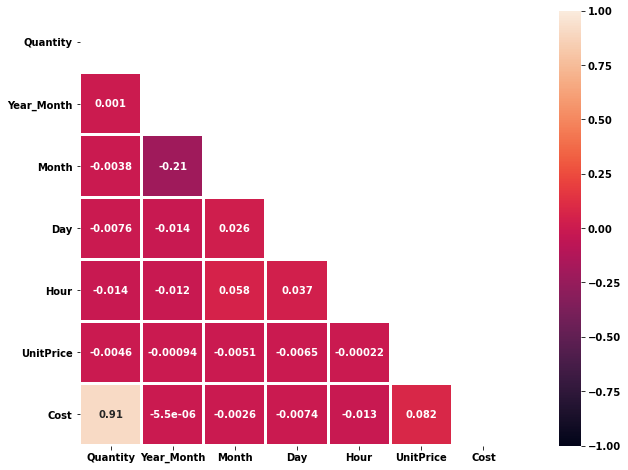

In [57]:
matrix=np.triu(dfcorr)
plt.figure(figsize=(16,8))
sns.heatmap(dfcorr,annot=True,square=True,mask=matrix,linewidths=2,vmin=-1,vmax=1)

In [58]:
dfcross=pd.DataFrame({'UnitPrice':dftemp2['UnitPrice'],'Quantity':dftemp2['Quantity']})
dfcross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UnitPrice  392692 non-null  float64
 1   Quantity   392692 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 9.0 MB


In [59]:
dfcross.head(10)

,UnitPrice,Quantity
0,2.55,6
1,3.39,6
2,2.75,8
3,3.39,6
4,3.39,6
5,7.65,2
6,4.25,6
7,1.85,6
8,1.85,6
9,1.69,32


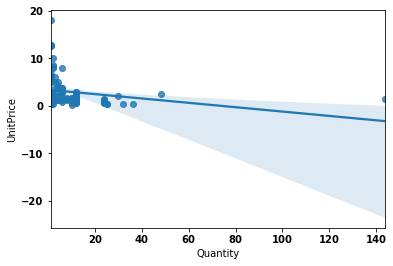

In [60]:
sns.regplot(x='Quantity',y='UnitPrice',data=dfcross.sample(n=100))

#### We observe that there is a very slight negative correlation between the quantity purchased and price of an item and also that the total price of a transaction may be large purely due to the quantity purchased rather than the price of the item itself

### Chi squared test

In [61]:
stat,p,dof,expected=scipy.stats.chi2_contingency(dfcross)
p

0.0

In [62]:
prob = 0.95
critical = scipy.stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')

Dependent (reject H0)


In [63]:
stat,critical

(3143405.9478273764, 394149.83471579925)

In [64]:
alpha=0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


#### We conclude that the price and quantity purchased are dependent using the chi squared test

### Plotting a Normal probability plot for normalized values of UK purchase times

In [65]:
dftest=df[df['Country']=='United Kingdom']
dftest.shape

(349227, 13)

In [66]:
dftest.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,Hour,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,201012,12,3,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,201012,12,3,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34


In [67]:
p=[]
x=list(dftest['Hour'])
x=[i for i in x if i!=0]
x.sort()
l=len(x)
min1,max1=min(x),max(x)
norm1=lambda x:(x-min1)/(max1-min1)
x=[norm1(i) for i in x]
pi=lambda i,n:(i-0.5)/n
n=len(x)
p=[pi(i,n) for i in range(1,l+1)]

In [68]:
Zscores=scipy.stats.zscore(p)

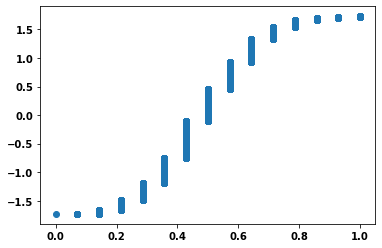

In [69]:
plt.scatter(x,Zscores)

#### We can hereby conclude that purchase times are somewhat normally distributed as per the graph